In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris=load_iris()
# numpy 데이터set 구성 방법
iris_frame=pd.DataFrame(data=np.c_[iris["data"],iris["target"]],columns=iris["feature_names"]+["target"])
# target행 글자 데이터 map을 통해 숫자로 바꾸기.
iris_frame["target"]=iris_frame["target"].map({0:"setosa",1:"versicolor",2:"virginica"})
x=iris_frame.iloc[:,:-1] # 모든 행,열은 처음부터 마지막 행전까지
y=iris_frame.iloc[:,[-1]] # 마지막 행만!
iris_frame["sepal length"]=iris_frame["sepal length (cm)"]
iris_frame["sepal width"]=iris_frame["sepal width (cm)"]
iris_frame["petal length"]=iris_frame["sepal length (cm)"]
iris_frame["petal width"]=iris_frame["petal width (cm)"]
iris_frame=iris_frame.drop(["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"],axis=1)
iris_frame

,target,sepal length,sepal width,petal length,petal width
0,setosa,5.1,3.5,5.1,0.2
1,setosa,4.9,3.0,4.9,0.2
2,setosa,4.7,3.2,4.7,0.2
3,setosa,4.6,3.1,4.6,0.2
4,setosa,5.0,3.6,5.0,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,6.7,2.3
146,virginica,6.3,2.5,6.3,1.9
147,virginica,6.5,3.0,6.5,2.0
148,virginica,6.2,3.4,6.2,2.3


# feature 중 sepal에 관련된 두개의 feature만 이용해서 학습(시각화가 비교적 편리함)

### decisiontree 세부특성 변경: max-depth, impurity, splitter

### max-depth: 트리의 길이를 조절해줌으로써 길이를 늘릴수 있음.

### impurity: criterion="gini"를 "entropy"로 바꿔봄으로써 변경 가능. 
gain=gini 전 불순도-후 불순도(node 1의 자료 개수 가중치*불순도+node2의 자료 개수 가중치 * 불순도), 모델 여러개를 생성했을 때 둘 중 gain이 더 높은 node를 채택! 연속형 변수는 gain 값이 더 높은 분류 기준을 채택

### splitter: splitter의 기본은 splitter="best". 이것을 splitter="random"으로 바꿀 수 있음.


### post-pruning
과적합이 일어날 경우를 방지하기 위해, generalization error 값이 늘어난 부분에서 가지치기를 하자. 
training error: 오류 개수/전체 자료 개수. 
generalization error: (오류 개수+전체 node개수*0.5)/1000
원래는 training error 계산법으로 node로 나누기 전후를 비교했지만, 이제는 generalization error 로 분류. 오류의 개수 상관없이 전체 node의 개수가 늘어날수록 error도 늘어남. 

In [5]:
# decision tree criterion이 gini에 해당. tree의 최대 깊이는 5임.
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0,criterion="gini",max_depth=5)
import matplotlib.colors as colors
df1=iris_frame[["sepal length","sepal width","target"]]
x=df1.iloc[:,0:2]
y=df1.iloc[:,2].replace({"setosa":0,"versicolor":1,"virginica":2}).copy()
clf.fit(x,y)
N=100

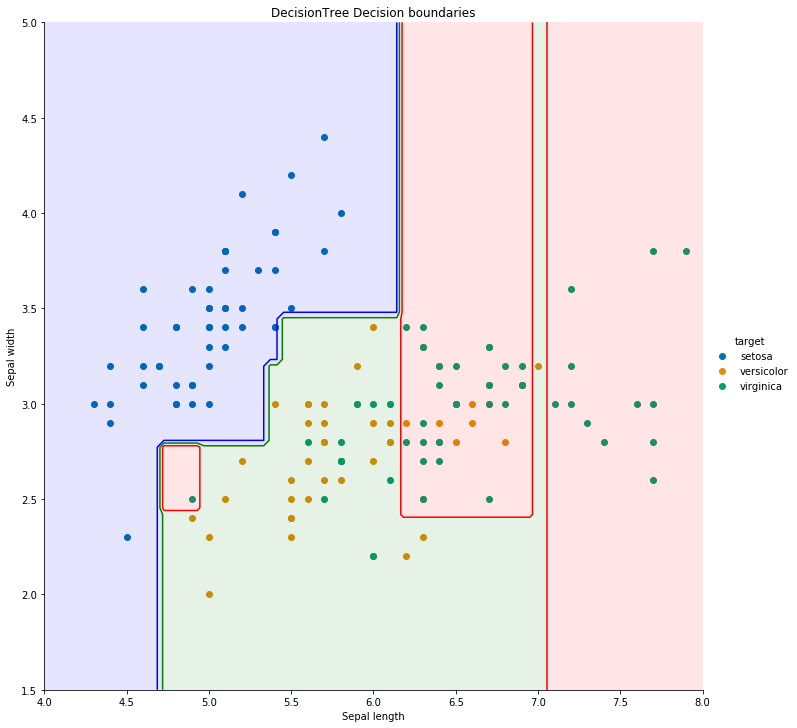

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt
# 지정 범위(x_,y_)의 직사각형 격자점 만들기
x_=np.linspace(4,8,N)
y_=np.linspace(1.5,5,N)
x_,y_=np.meshgrid(x_,y_)

color_list=["Blues","Greens","Reds"]
my_norm=colors.Normalize(vmin=-1.,vmax=1.)

# 점들 표시
g=sn.FacetGrid(iris_frame,hue="target",size=10,palette="colorblind").map(plt.scatter,"sepal length","sepal width").add_legend()

# g 그래프의 점을 
my_ax=g.ax

# clf.predict: decision tree의 예측값
# computing the predicted class function for each value on the grid
zz=np.array([clf.predict([[xx,yy]])[0] for xx,yy in zip(np.ravel(x_),np.ravel(y_))])

# reshaping the predicted class into the meshgrid shape
z=zz.reshape(x_.shape)

# plot the filled and boundary contours
# contourf: 해당 영역의 색깔 채우기
# contour: 해당 영역의 boundary 선으로 긋기.
my_ax.contourf(x_,y_,z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(x_,y_,z,2,alpha=1, colors = ('blue','green','red'))

my_ax.set_xlabel("Sepal length")
my_ax.set_ylabel("Sepal width")
my_ax.set_title("DecisionTree Decision boundaries")
plt.show()
